<a href="https://colab.research.google.com/github/philo-meerman/Coding-Lab/blob/master/Copy_of_01_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBDA Big Data - CODING LAB - WEEK 01

# Program Structure

Let's do some machine learning, and recognize handwritten digits.

* We will use the "digits dataset" and Logistic Regression to classify images of handwritten digits:
* The dataset contains 1800 images of handwritten digits
* Each image is 8x8 in levels of grey

Regularization with Logistic Regression:  
* $\textrm{Loss} = -log(\textrm{likelihood}) + \frac{1}{C}*\sum_i{\beta_i^2}$
  * $\beta_i$ is the coefficient for the feature $i$ 
  * $C$ is the hyperparameter


__


**PLAN**
1. What skills we need?
  * logistic regression (sklearn's `LogisticRegression`)
  * split dataset between train / test (sklearn's `train_test_split`)
  * show how the classifier works = confusion matrix (sklearn's `ConfusionMatrixDisplay`)
  * get the digits dataset (sklearn `load_digits`)
  * visualize some image sample (`matplotlib`)
  * manipulate the images from vector to matrix / matrix to vector (`numpy`)
1. Assemble the team
  * load the dataset
  * split it into train / test
  * create the logistic regression model
1. Execute the plan
  * visualize samples from the dataset: show an image and its label
  * train the logistic regression model
1. Share the bounty
  * show the confusion matrix on the test dataset
  * distribute the model


## Skills = Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


## Assemble the Team


In [2]:
digits = load_digits()

In [7]:
print(type(digits.data))
print(digits.data.shape)

<class 'numpy.ndarray'>
(1797, 64)


In [8]:
images = digits.data

In [9]:
digits.target.shape

(1797,)

In [13]:
X = digits.data
y = digits.target

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.1)
x_train.shape

(1617, 64)

In [18]:
log_reg = LogisticRegression(max_iter=10000, C=1.0)

## Execute the Plan



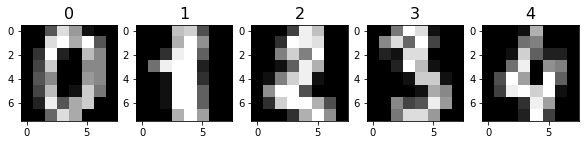

In [22]:
plt.figure(figsize=(10,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f'{label}', fontsize = 16)

In [20]:
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

## Share the Bounty

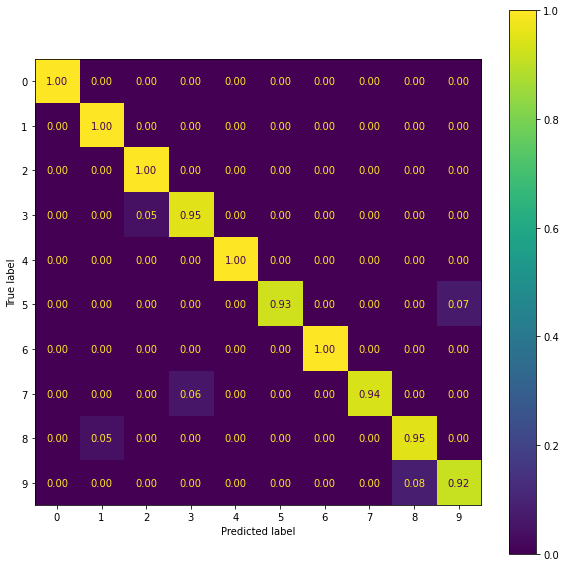

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
confusion_matrix = ConfusionMatrixDisplay.from_estimator(log_reg, x_test, y_test, ax=ax, values_format=".2f", normalize="true")


# Functions

Let's have a closer look at the functions we used in the previous example

## `load_digits`

* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
* It has 3 parameters
  * `n_class` - int - default=10
  * `return_X_y` - bool - default=False
  * `as_frame` - bool - default=False

* `load_digits()` is the same as `load_digits(n_class=10, return_X_y=False, as_frame=False)`

## `train_test_split`


* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* takes IN a list of data of identical size
* splits each one into TRAIN / TEST
* It uses the `*arrays ` parameter
  * collects all arrays in 1 list
* then a few named parameters, all with default values
  * they are optional for the user, no need to mention them all

**USABILITY**
* coding witht he `*arrays` is somehow complex
* but from the user perspective, it writes easily
  * `data1_train, data1_test, data2_train, data2_test = train_test_split(data1, data2, etc...)`

# Default Values

* parameters with default value go **at the end** of the list of parameters